#Zasoby

* Multiple time-series forecasting with a single query for NYC Citi Bike trips

* https://cloud.google.com/bigquery/docs/e2e-journey
* https://cloud.google.com/bigquery/docs/arima-multiple-time-series-forecasting-tutorial
* https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create-time-series

* Qwiklabs https://colab.research.google.com/drive/1MTHGP210-KSmmI6pIxrI8Dn31sDSN27O?authuser=3

#Cele

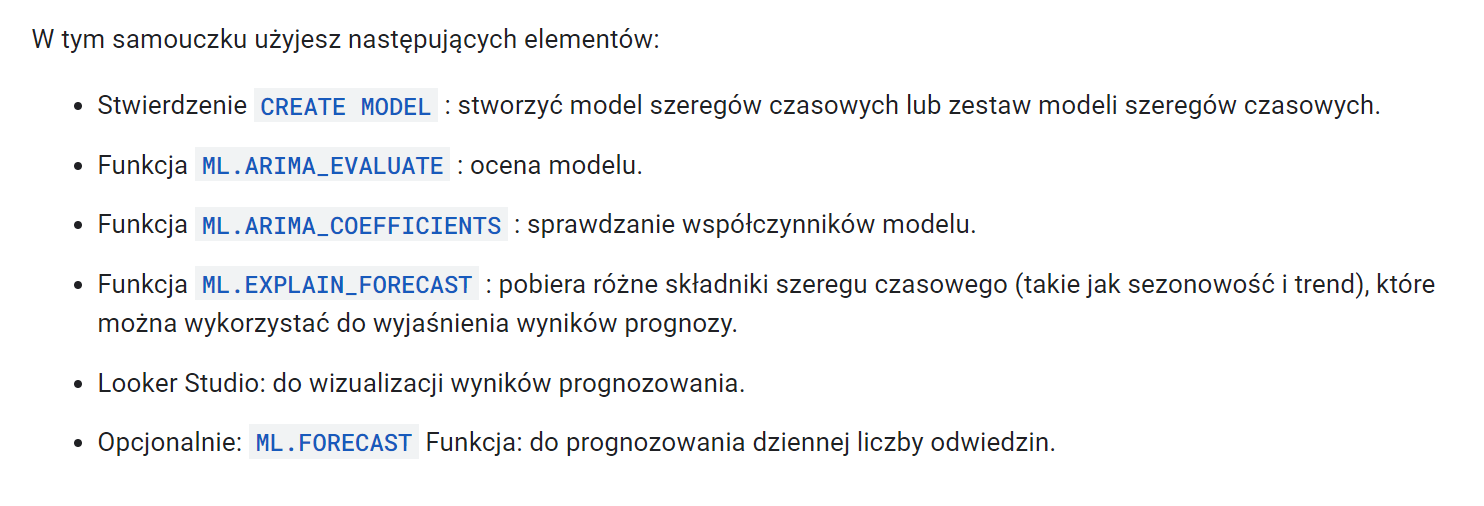

#Wizualizuj szeregi czasowe, które chcesz prognozować (Krok 1)

In [ ]:
%%bigquery

SELECT
   EXTRACT(DATE from starttime) AS date,
   COUNT(*) AS num_trips
FROM
  `bigquery-public-data`.new_york.citibike_trips
GROUP BY date

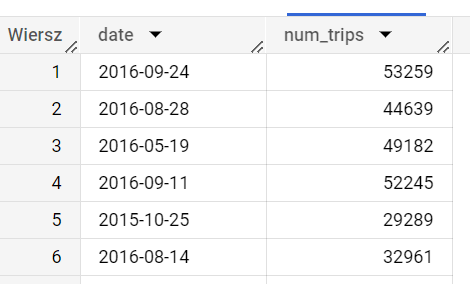

#Utwórz model szeregów czasowych, aby przeprowadzić prognozowanie pojedynczych szeregów czasowych (Krok 2)

In [ ]:
%%bigquery

CREATE OR REPLACE MODEL pmackowka_us.model_0131
OPTIONS
  (model_type = 'ARIMA_PLUS',
   time_series_timestamp_col = 'date',
   time_series_data_col = 'num_trips'
  ) AS
SELECT
   EXTRACT(DATE from starttime) AS date,
   COUNT(*) AS num_trips
FROM
  `bigquery-public-data`.new_york.citibike_trips
GROUP BY date

#Prognozuj szeregi czasowe i wizualizuj wyniki (Krok 3)

In [ ]:
%%bigquery

SELECT
  *
FROM
  ML.EXPLAIN_FORECAST(MODEL pmackowka_us.model_0132,
                      STRUCT(365 AS horizon, 0.9 AS confidence_level))

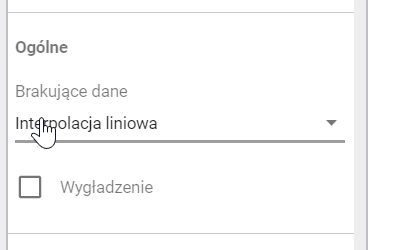

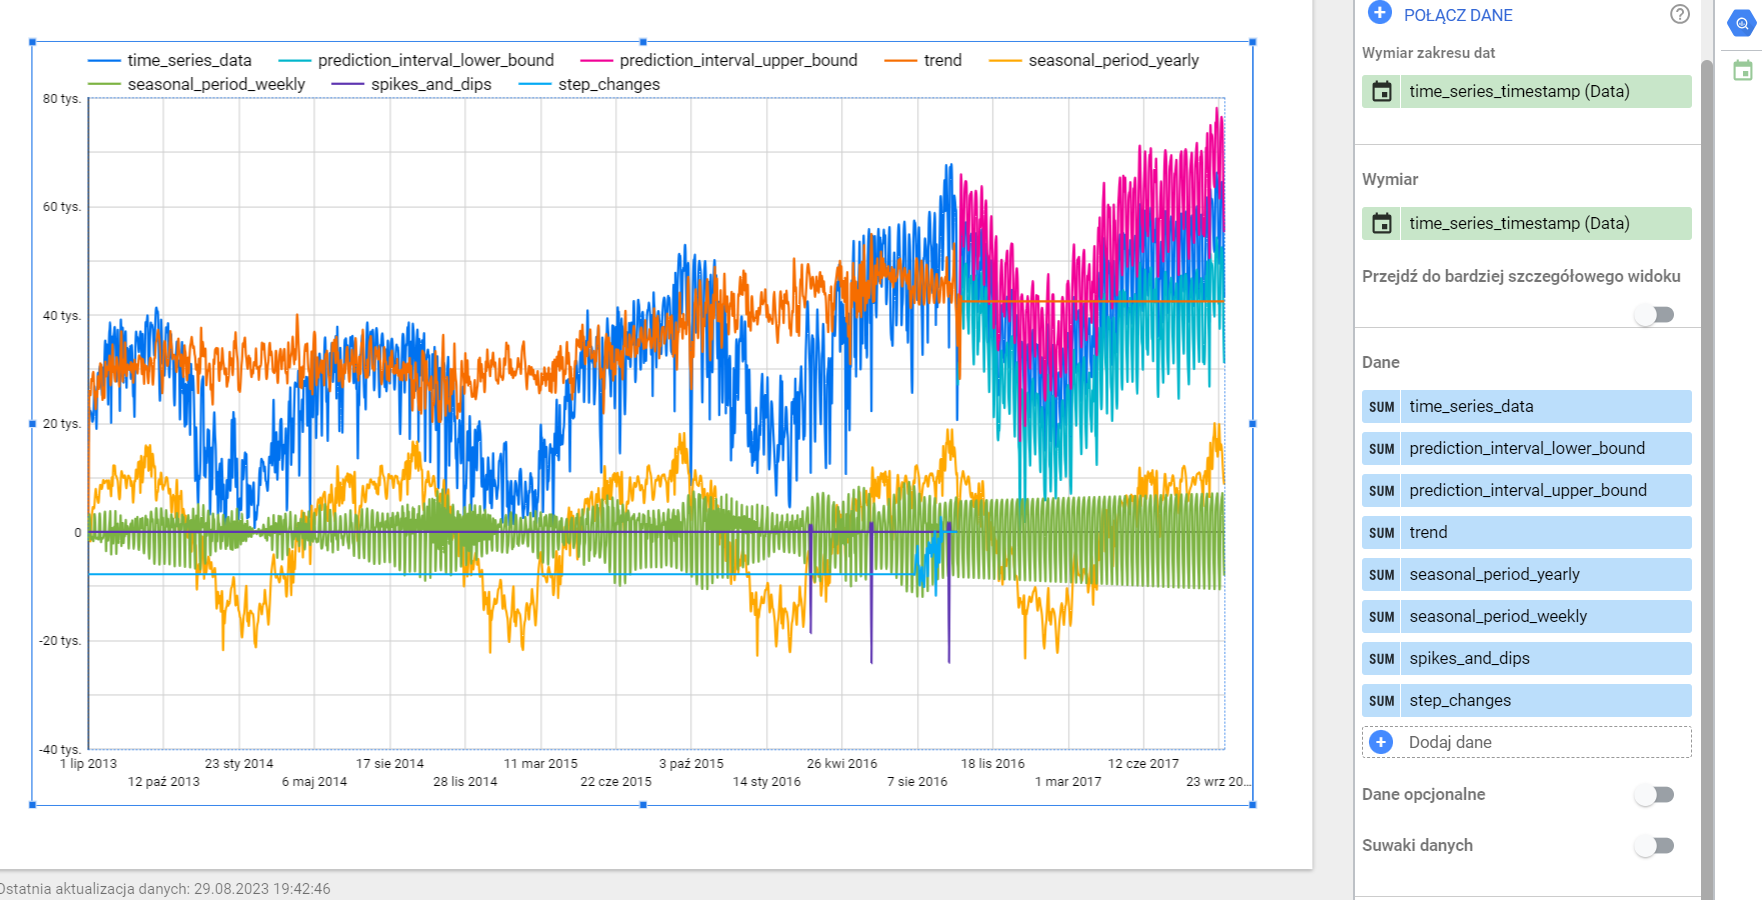

#Prognozuj jednocześnie wiele szeregów czasowych (Krok 4)

In [ ]:
%%bigquery

CREATE OR REPLACE MODEL `pmackowka_us.model_0133`
OPTIONS
  (model_type = 'ARIMA_PLUS',
   time_series_timestamp_col = 'date',
   time_series_data_col = 'num_trips',
   time_series_id_col = 'start_station_name',
   auto_arima_max_order = 5
  ) AS


SELECT
   start_station_name,
   EXTRACT(DATE from starttime) AS date,
   COUNT(*) AS num_trips
FROM
  `bigquery-public-data`.new_york.citibike_trips
WHERE start_station_name LIKE '%Central Park%'
GROUP BY start_station_name, date

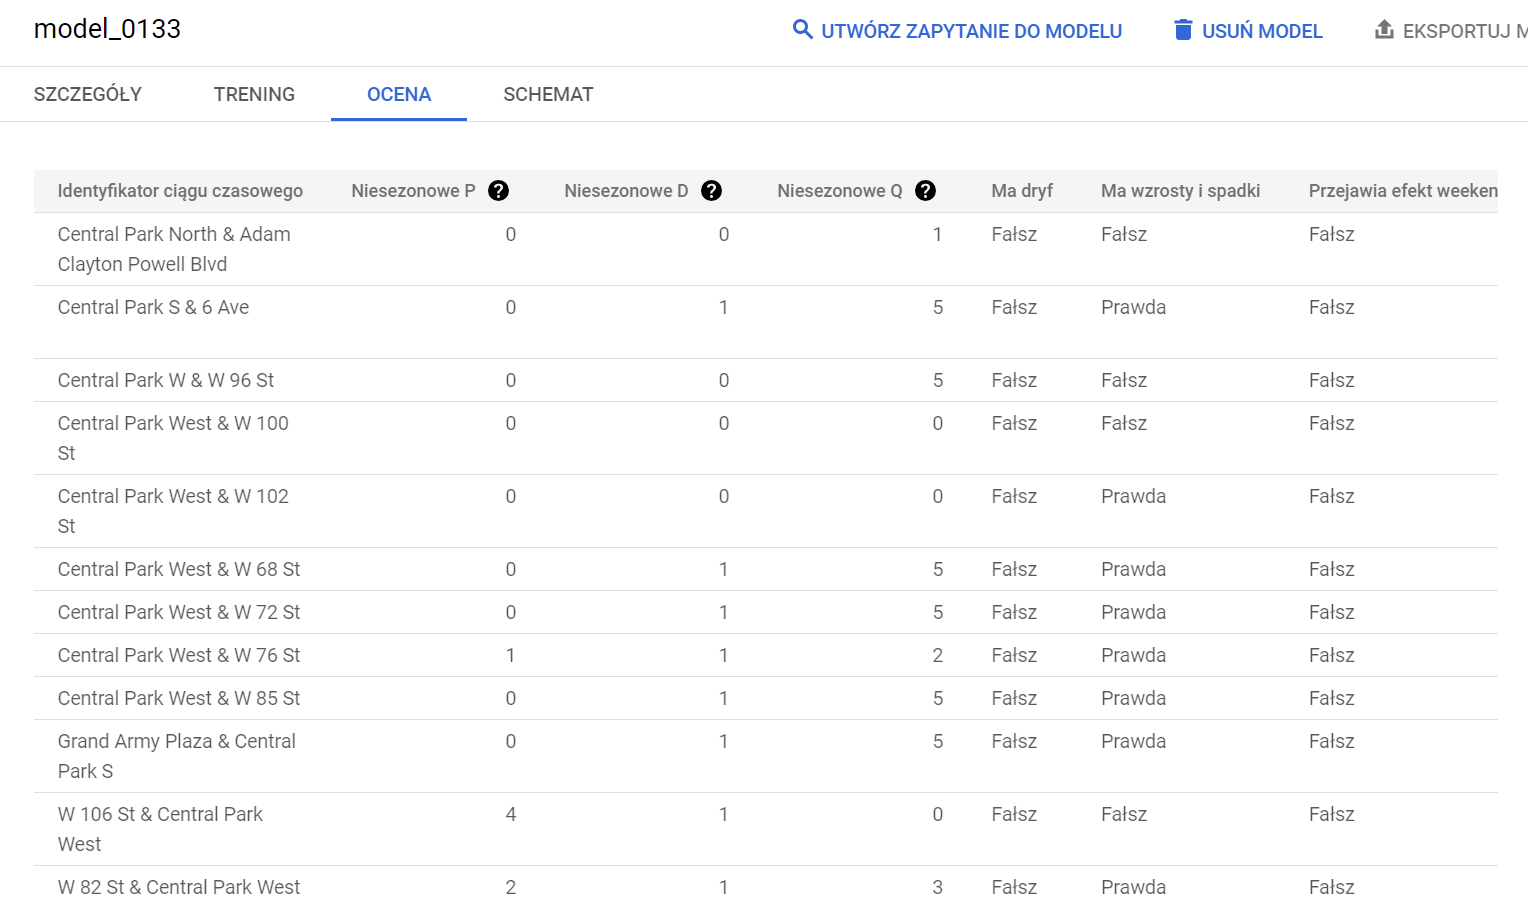

#Sprawdź metryki oceny zestawu modeli szeregów czasowych (Krok 5)

In [ ]:
%%bigquery

SELECT
 *
FROM
 ML.ARIMA_EVALUATE(MODEL pmackowka_us.model_0133)

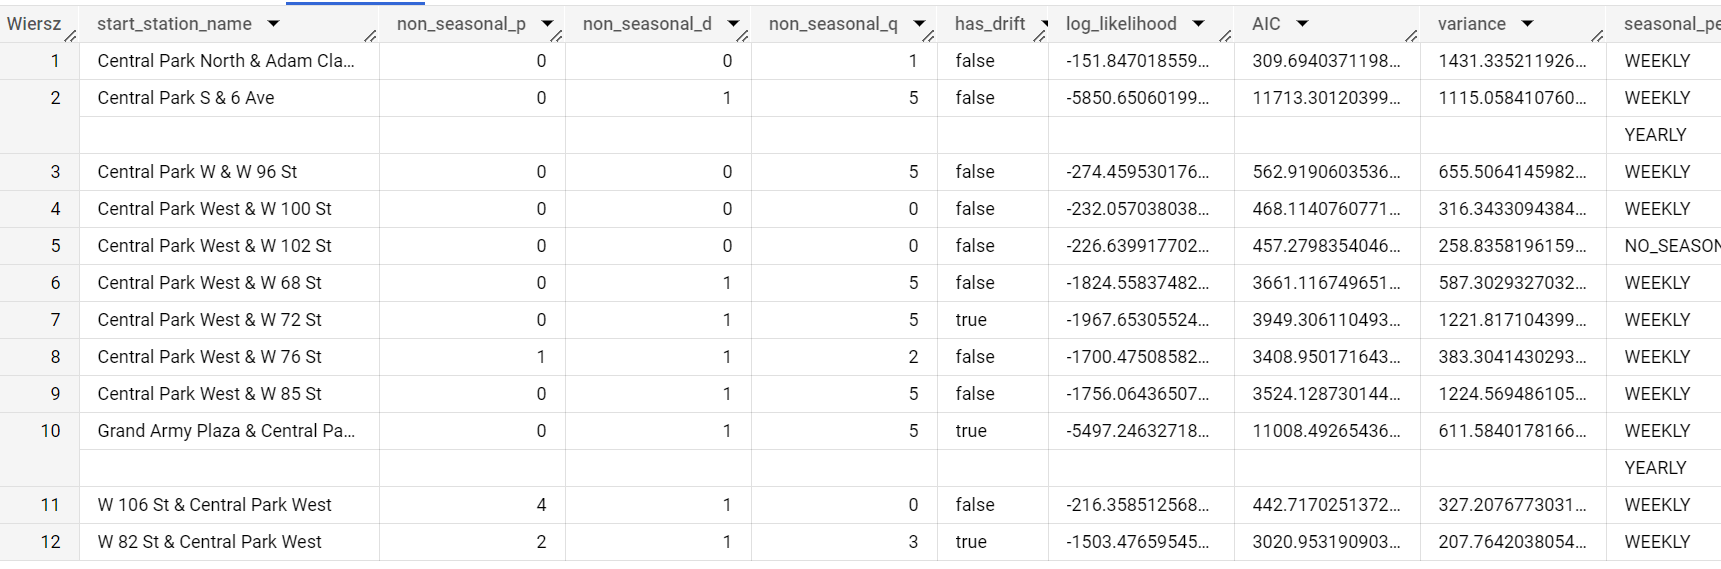

#Sprawdź współczynniki swoich modeli (Krok 6)

* `start_station_name` pierwsza kolumna zawiera adnotację o szeregach czasowych, do których dopasowywany jest każdy model szeregów czasowych.

In [ ]:
%%bigquery

SELECT
 *
FROM
 ML.ARIMA_COEFFICIENTS(MODEL pmackowka_us.model_0133)

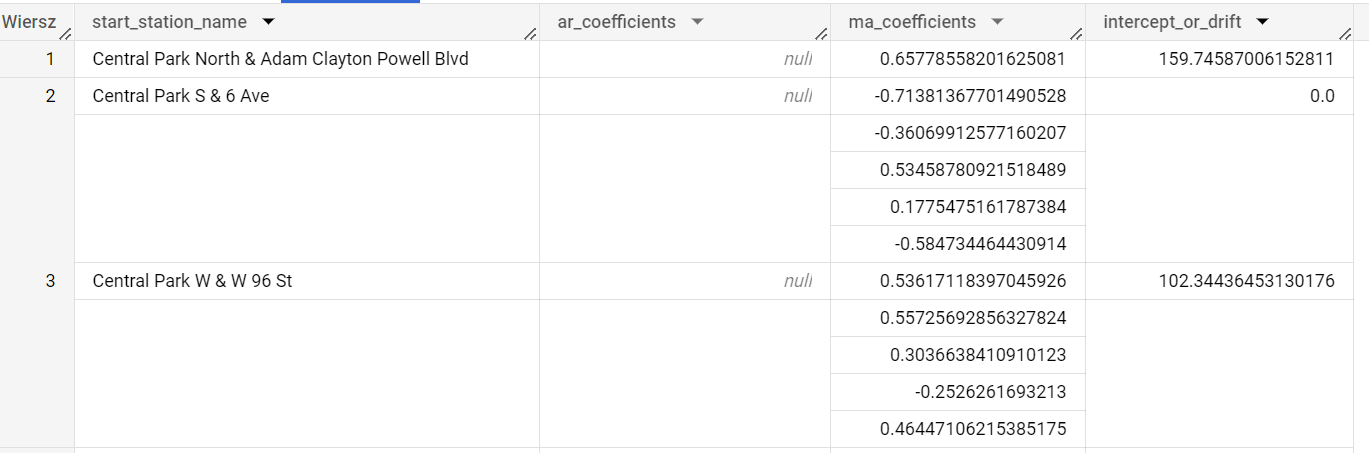

#Użyj modelu, aby prognozować wiele szeregów czasowych jednocześnie z wyjaśnieniami (Krok 7)

* Funkcja `ML.EXPLAIN_FORECAST` prognozuje przyszłe wartości szeregów czasowych z przedziałem predykcji przy użyciu Twojego modelu `pmackowka_us.model_0133` i jednocześnie zwraca wszystkie oddzielne składniki szeregu czasowego.

In [ ]:
%%bigquery

SELECT
 *
FROM
 ML.EXPLAIN_FORECAST(MODEL pmackowka_us.model_0133,
                     STRUCT(5 AS horizon, 0.9 AS confidence_level))

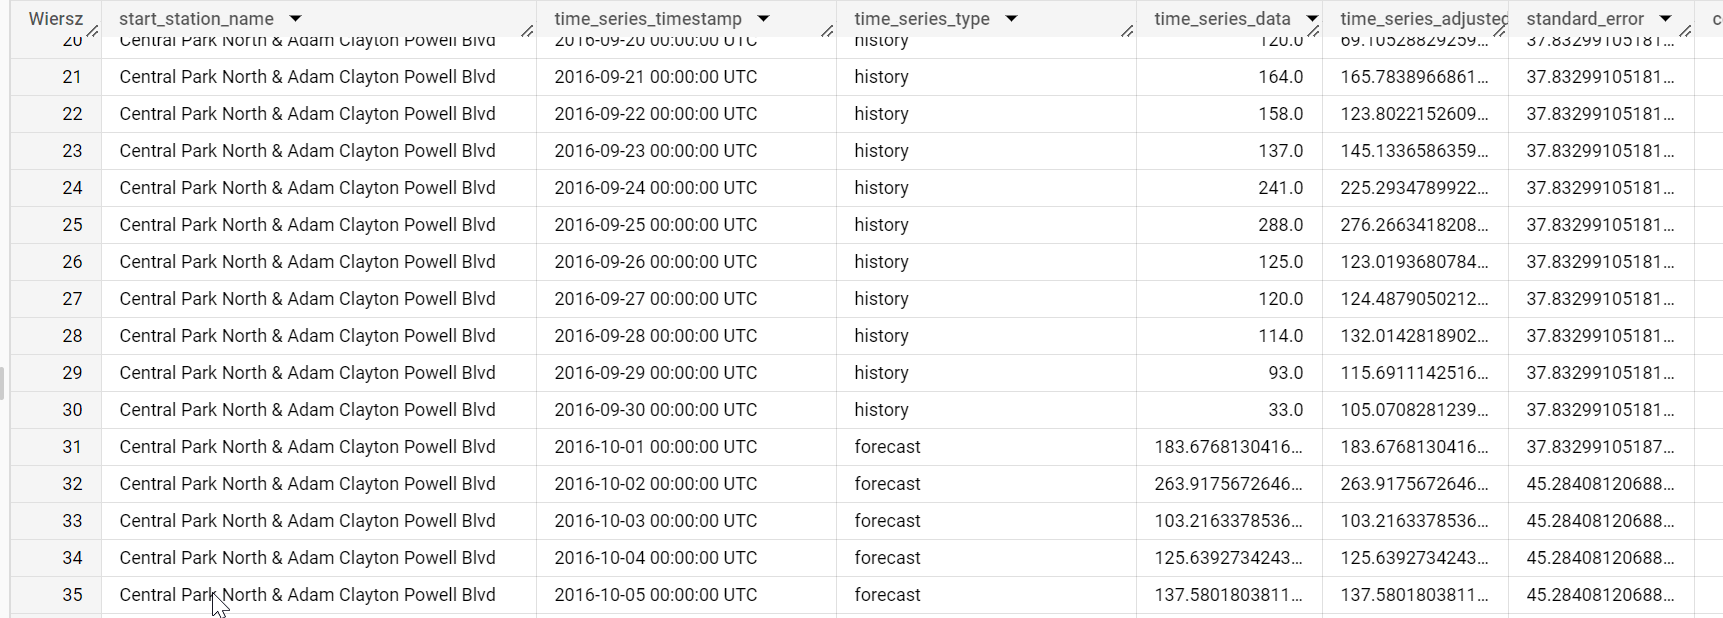

#Użyj modelu, aby prognozować wiele szeregów czasowych jednocześnie (Krok 8)

* Funkcji `ML.FORECAST` można również użyć do prognozowania przyszłych wartości szeregów czasowych z przedziałem predykcji przy użyciu modelu `pmackowka_us.model_0133`.

* W prognozowaniu szeregów czasowych przedział przewidywania, który jest ujmowany przez dolną i górną granicę, jest równie ważny jak `forecast_value`. Punkt `forecast_value` środkowy przedziału predykcji. Przedział przewidywania zależy od `standard_error i confidence_level`.

In [ ]:
%%bigquery

SELECT
 *
FROM
 ML.FORECAST(MODEL pmackowka_us.model_0133,
             STRUCT(5 AS horizon, 0.9 AS confidence_level))

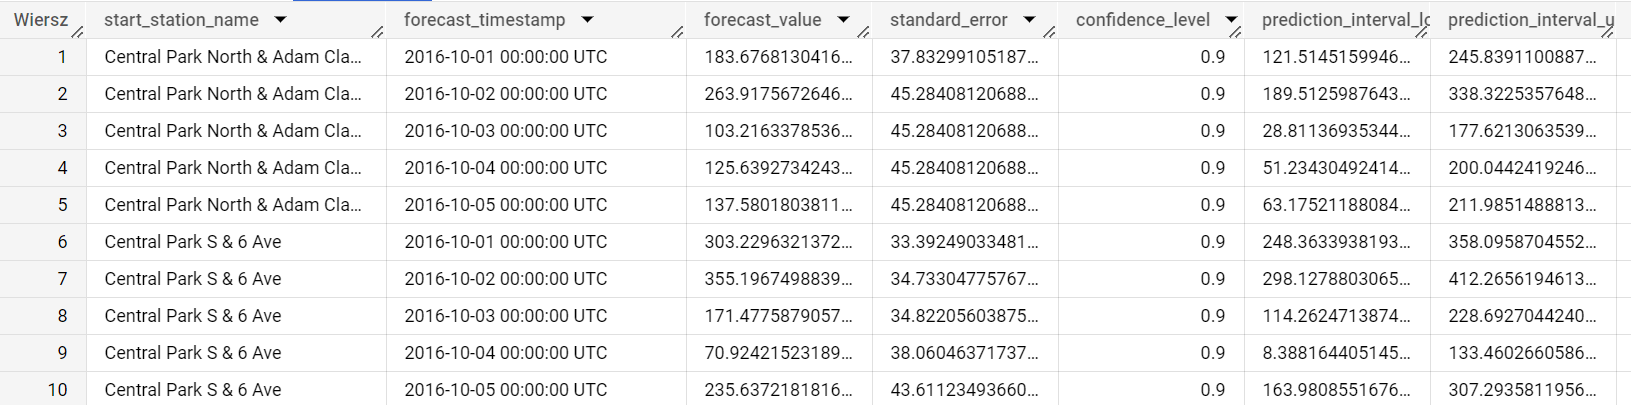